<a href="https://colab.research.google.com/github/bartiralira/bootcampIA/blob/main/BootCamp1_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Participantes (RM - NOME):***<br>
Vitor Luiz Carvalhal - 337129<br>
Ricardo Fabbro Antonelli - 339505<br>
Bartira Lira Lafiandre - 340177<br>
Tiago Batista Pessoa - 339575<br>


## **0.Biblioteca e afins**



In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
!pip install missingno
import missingno as msno
import seaborn as sbs
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score
from tqdm import tqdm
from sklearn.decomposition import PCA

In [153]:
#from google.colab import drive
#drive.mount('/content/drive')

## **1.Analisando os dados**

In [154]:
url = 'https://raw.githubusercontent.com/bartiralira/bootcampIA/a0095c50dfa059f29ebb71a6afaf19f7bbdfc95a/solicitacoescredito.csv'
dfo=pd.read_csv(url, engine='python')
dfo.head()

,numero_solicitacao,razaoSocial,nomeFantasia,cnpjSemTraco,maiorAtraso,margemBrutaAcumulada,percentualProtestos,primeiraCompra,prazoMedioRecebimentoVendas,titulosEmAberto,valorSolicitado,status,definicaoRisco,diferencaPercentualRisco,percentualRisco,dashboardCorrelacao,valorAprovado,dataAprovadoEmComite,periodoBalanco,ativoCirculante,passivoCirculante,totalAtivo,totalPatrimonioLiquido,endividamento,duplicatasAReceber,estoque,faturamentoBruto,margemBruta,periodoDemonstrativoEmMeses,custos,anoFundacao,intervaloFundacao,capitalSocial,restricoes,empresa_MeEppMei,scorePontualidade,limiteEmpresaAnaliseCredito,dataAprovadoNivelAnalista
0,1,James Richardson-Patel,Alexandra Williams,KEBE17609492220843,0,0.252,0.000,2015-12-10T00:00:00,0,0.000,50000.000,AprovadoAnalista,De 11 a 30 % - Baixo,0.717,0.283,0.000,50000.000,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,1766880.000,0.000,12.000,0.000,2003.000,Acima de 17 anos,90000.000,False,True,1.000,43200.000,2020-02-03T20:57:33
1,2,Dr. Geoffrey Walsh,Mr. Darren Arnold,JRBK88908250677300,0,0.000,nan,2019-06-12T17:28:31,0,0.000,10000.000,DocumentacaoReprovada,De 0 a 10 % - Muito Baixo,1.000,0.000,0.000,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,NaN,NaN,0.000,nan,NaN
2,3,Joanna Hudson,Dr. David Rees,GCVQ28531614261293,4,0.625,0.000,2019-11-27T00:00:00,0,0.000,20000.000,AprovadoAnalista,De 11 a 30 % - Baixo,0.717,0.283,0.000,20000.000,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,2814940.000,0.000,7.000,0.000,2014.000,De 6 a 10 anos,20000.000,False,True,1.000,4320.000,2020-02-04T16:40:49
3,4,Gordon Jones-Hopkins,Sara Reid-Robson,KJND32266018316396,20,0.000,nan,2017-02-13T17:20:27,0,0.000,25000.000,AprovadoAnalista,De 51 a 80 % - Alto,0.396,0.604,0.486,15000.000,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,1285274.000,0.000,12.000,0.000,2013.000,De 6 a 10 anos,30000.000,False,True,0.000,5920.000,2020-02-04T16:37:52
4,5,Nigel Lee,Dr. Stanley Duncan,CGQN15826802440348,20,0.454,0.000,2010-07-13T00:00:00,20,1486.950,50000.000,AprovadoAnalista,De 11 a 30 % - Baixo,0.830,0.170,0.000,50000.000,NaN,2019-09-30T00:00:00,14758917.000,12149031.000,25793410.000,14544378.000,3039112.000,11797928.000,3047791.000,40779757.000,81459809.000,9.000,40680051.000,2002.000,Acima de 17 anos,75000.000,False,False,1.000,89000.000,2020-02-04T15:06:28


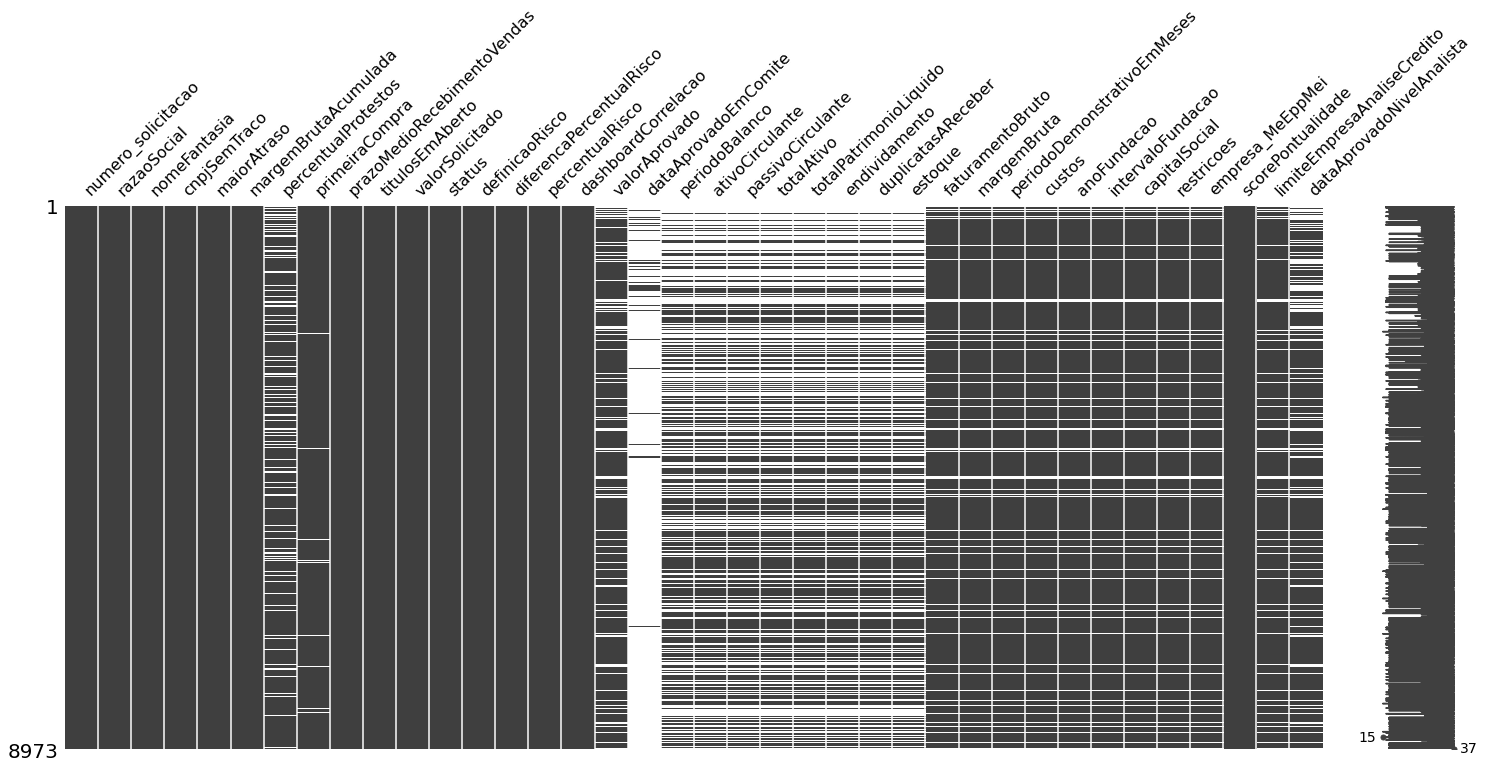

In [155]:
%matplotlib inline
msno.matrix(dfo)

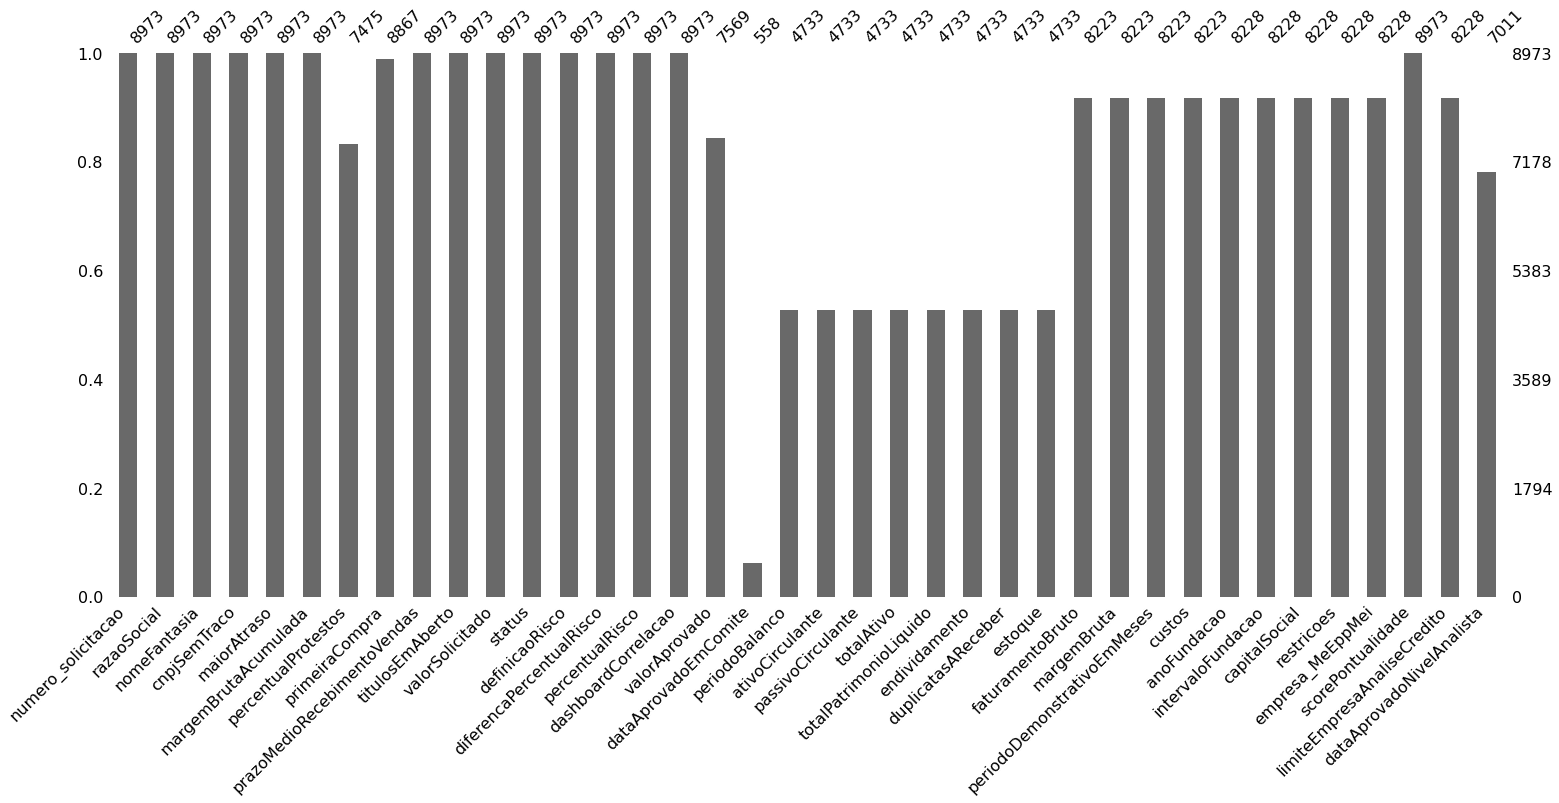

In [156]:
%matplotlib inline
msno.bar(dfo)

AxesSubplot(0.125,0.3515;0.775x0.5285) 



Text(0.5, 1.0, 'Correlation matrix')

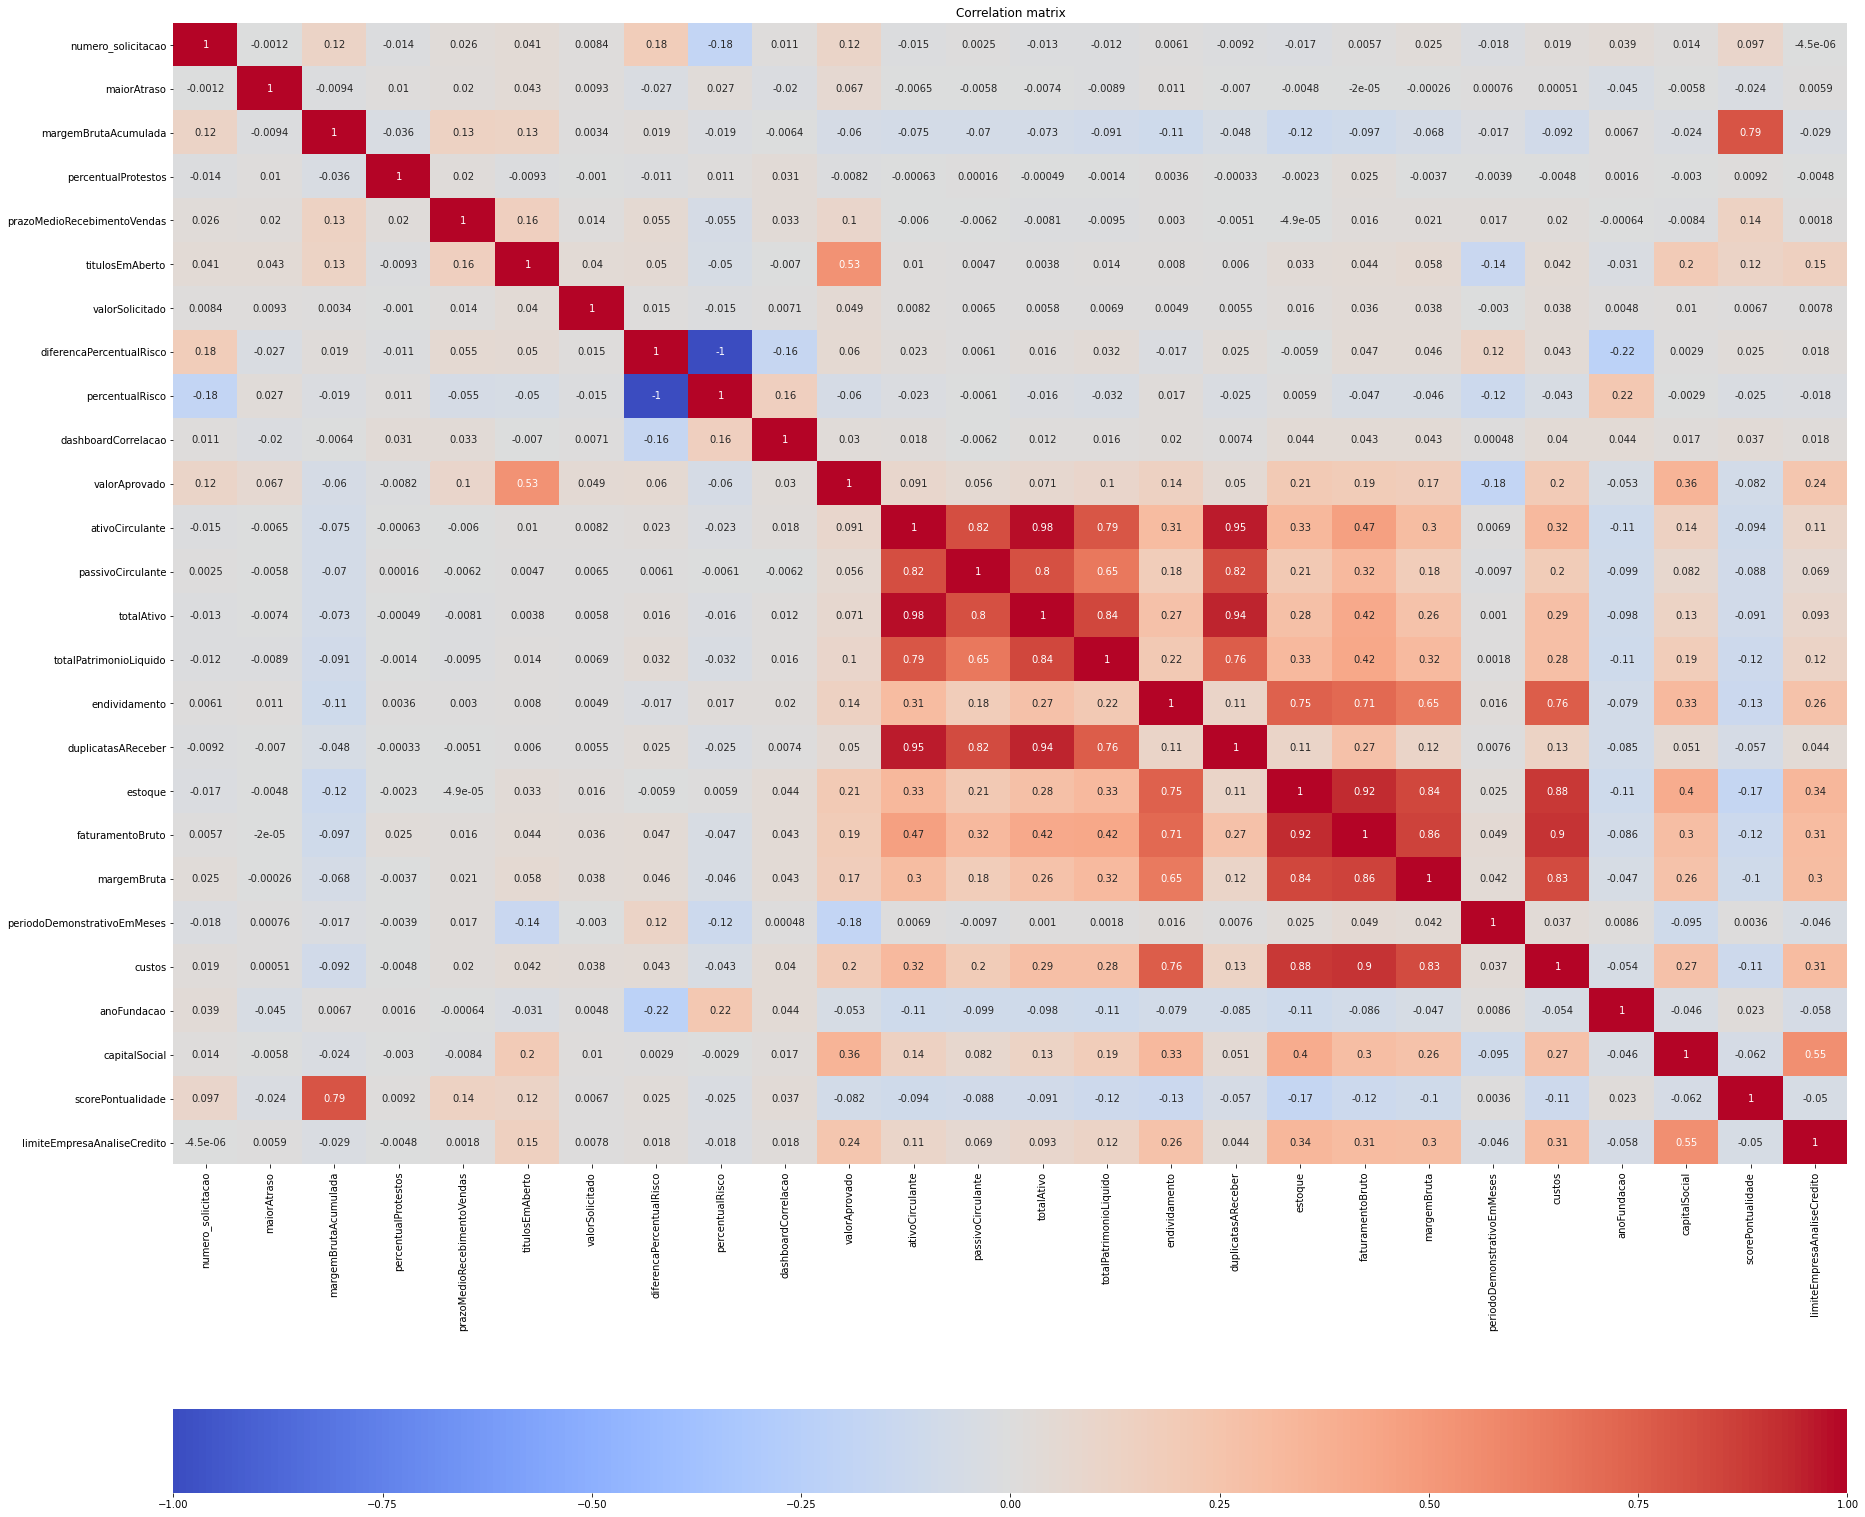

In [157]:
plt.figure(figsize=(30,30)) 
print(sbs.heatmap(dfo.corr(), annot=True, cmap="coolwarm",cbar_kws= {'orientation': 'horizontal'}),"\n")
plt.title('Correlation matrix')

In [158]:
dfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8973 entries, 0 to 8972
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   numero_solicitacao           8973 non-null   int64  
 1   razaoSocial                  8973 non-null   object 
 2   nomeFantasia                 8973 non-null   object 
 3   cnpjSemTraco                 8973 non-null   object 
 4   maiorAtraso                  8973 non-null   int64  
 5   margemBrutaAcumulada         8973 non-null   float64
 6   percentualProtestos          7475 non-null   float64
 7   primeiraCompra               8867 non-null   object 
 8   prazoMedioRecebimentoVendas  8973 non-null   int64  
 9   titulosEmAberto              8973 non-null   float64
 10  valorSolicitado              8973 non-null   float64
 11  status                       8973 non-null   object 
 12  definicaoRisco               8973 non-null   object 
 13  diferencaPercentua

In [159]:
#verificando quantos sao os missings
dfo.isnull().sum().sort_values(ascending=True)

numero_solicitacao                0
scorePontualidade                 0
dashboardCorrelacao               0
percentualRisco                   0
definicaoRisco                    0
status                            0
valorSolicitado                   0
titulosEmAberto                   0
diferencaPercentualRisco          0
margemBrutaAcumulada              0
maiorAtraso                       0
cnpjSemTraco                      0
nomeFantasia                      0
razaoSocial                       0
prazoMedioRecebimentoVendas       0
primeiraCompra                  106
anoFundacao                     745
intervaloFundacao               745
capitalSocial                   745
restricoes                      745
limiteEmpresaAnaliseCredito     745
empresa_MeEppMei                745
faturamentoBruto                750
custos                          750
periodoDemonstrativoEmMeses     750
margemBruta                     750
valorAprovado                  1404
percentualProtestos         

In [160]:
#verificando a correlação com os campos de valor aprovado que é a nossa variavel de interesse.
#Vamos focar nessas variaveis
print(round(dfo.corr(method='pearson')["valorAprovado"]*100,2).sort_values(ascending=False),'\n')

valorAprovado                 100.000
titulosEmAberto                53.130
capitalSocial                  35.530
limiteEmpresaAnaliseCredito    24.080
estoque                        20.530
custos                         19.950
faturamentoBruto               18.830
margemBruta                    17.350
endividamento                  14.170
numero_solicitacao             11.680
totalPatrimonioLiquido         10.150
prazoMedioRecebimentoVendas     9.960
ativoCirculante                 9.080
totalAtivo                      7.070
maiorAtraso                     6.710
diferencaPercentualRisco        6.030
passivoCirculante               5.610
duplicatasAReceber              4.980
valorSolicitado                 4.890
dashboardCorrelacao             3.040
percentualProtestos            -0.820
anoFundacao                    -5.270
margemBrutaAcumulada           -5.980
percentualRisco                -6.030
scorePontualidade              -8.160
periodoDemonstrativoEmMeses   -18.250
Name: valorA

In [161]:
#entendendo o score de pontualidade que parece ser uma variavle importante para o negocio quando falamos de credito
print(round(dfo.corr(method='pearson')["scorePontualidade"]*100,2).sort_values(ascending=False),'\n')

scorePontualidade             100.000
margemBrutaAcumulada           79.240
prazoMedioRecebimentoVendas    14.000
titulosEmAberto                12.020
numero_solicitacao              9.680
dashboardCorrelacao             3.670
diferencaPercentualRisco        2.490
anoFundacao                     2.310
percentualProtestos             0.920
valorSolicitado                 0.670
periodoDemonstrativoEmMeses     0.360
maiorAtraso                    -2.440
percentualRisco                -2.490
limiteEmpresaAnaliseCredito    -4.980
duplicatasAReceber             -5.690
capitalSocial                  -6.220
valorAprovado                  -8.160
passivoCirculante              -8.770
totalAtivo                     -9.100
ativoCirculante                -9.410
margemBruta                   -10.040
custos                        -11.420
totalPatrimonioLiquido        -11.620
faturamentoBruto              -12.160
endividamento                 -13.120
estoque                       -16.590
Name: scoreP

In [162]:
#Vendo quantas solicitações são zero
dfo.groupby("scorePontualidade",as_index=False).agg({"numero_solicitacao":"count"}).sort_values(by=["numero_solicitacao"],ascending= False)

,scorePontualidade,numero_solicitacao
384,1.000,5594
0,0.000,1556
126,0.831,21
347,0.995,16
364,0.998,16
...,...,...
211,0.924,1
65,0.669,1
185,0.899,1
134,0.840,1


In [163]:
#vendo as correlações com o percentuial de protestos
print(round(dfo.corr(method='pearson')["percentualProtestos"]*100,2).sort_values(ascending=False),'\n')

percentualProtestos           100.000
dashboardCorrelacao             3.140
faturamentoBruto                2.450
prazoMedioRecebimentoVendas     1.990
percentualRisco                 1.130
maiorAtraso                     1.000
scorePontualidade               0.920
endividamento                   0.360
anoFundacao                     0.160
passivoCirculante               0.020
duplicatasAReceber             -0.030
totalAtivo                     -0.050
ativoCirculante                -0.060
valorSolicitado                -0.100
totalPatrimonioLiquido         -0.140
estoque                        -0.230
capitalSocial                  -0.300
margemBruta                    -0.370
periodoDemonstrativoEmMeses    -0.390
limiteEmpresaAnaliseCredito    -0.480
custos                         -0.480
valorAprovado                  -0.820
titulosEmAberto                -0.930
diferencaPercentualRisco       -1.130
numero_solicitacao             -1.400
margemBrutaAcumulada           -3.640
Name: percen

In [164]:
dfo.groupby("percentualProtestos",as_index=False).agg({"numero_solicitacao":"count"}).sort_values(by=["numero_solicitacao"],ascending= False)

,percentualProtestos,numero_solicitacao
0,0.000,7452
8,15.298,5
1,0.495,3
2,0.591,3
3,0.956,3
4,1.703,3
5,3.036,3
6,3.388,1
7,6.770,1
9,36.984,1


In [165]:
dfo[["scorePontualidade","percentualProtestos"]].corr()

,scorePontualidade,percentualProtestos
scorePontualidade,1.000,0.009
percentualProtestos,0.009,1.000


In [166]:
dfo.groupby("status").agg({"cnpjSemTraco":"count"})

,cnpjSemTraco
status,
AguardandoAprovacao,1
AprovadoAnalista,7011
AprovadoComite,558
DocumentacaoReprovada,504
EmAnaliseDocumentacao,289
ReprovadoAnalista,590
ReprovadoComite,20


In [167]:
dfo.empresa_MeEppMei.value_counts()

False    5046
True     3182
Name: empresa_MeEppMei, dtype: int64

In [168]:
dfo.groupby("status").agg({"cnpjSemTraco":"count"})


,cnpjSemTraco
status,
AguardandoAprovacao,1
AprovadoAnalista,7011
AprovadoComite,558
DocumentacaoReprovada,504
EmAnaliseDocumentacao,289
ReprovadoAnalista,590
ReprovadoComite,20


In [169]:
dfo[(dfo["percentualProtestos"]>15)]

,numero_solicitacao,razaoSocial,nomeFantasia,cnpjSemTraco,maiorAtraso,margemBrutaAcumulada,percentualProtestos,primeiraCompra,prazoMedioRecebimentoVendas,titulosEmAberto,valorSolicitado,status,definicaoRisco,diferencaPercentualRisco,percentualRisco,dashboardCorrelacao,valorAprovado,dataAprovadoEmComite,periodoBalanco,ativoCirculante,passivoCirculante,totalAtivo,totalPatrimonioLiquido,endividamento,duplicatasAReceber,estoque,faturamentoBruto,margemBruta,periodoDemonstrativoEmMeses,custos,anoFundacao,intervaloFundacao,capitalSocial,restricoes,empresa_MeEppMei,scorePontualidade,limiteEmpresaAnaliseCredito,dataAprovadoNivelAnalista
236,245,Gemma Charlton,Lydia Morrison,VSWM57040130755217,21,0.294,15.298,2019-08-09T00:00:00,107,0.000,20000.000,ReprovadoAnalista,De 31 a 50 % - Médio,0.642,0.358,0.000,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,229996561.000,0.000,5.000,0.000,1998.000,Acima de 17 anos,100000.000,True,False,1.000,136500.000,NaN
563,581,Gemma Charlton,Lydia Morrison,VSWM57040130755217,21,0.294,15.298,2019-08-09T00:00:00,107,0.000,20000.000,AprovadoAnalista,De 31 a 50 % - Médio,0.660,0.340,0.866,20000.000,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,229996561.000,0.000,5.000,0.000,1998.000,Acima de 17 anos,100000.000,True,False,1.000,136500.000,2020-02-21T17:53:15
3722,3795,Gemma Charlton,Lydia Morrison,VSWM57040130755217,21,0.294,15.298,2019-08-09T00:00:00,107,0.000,20000.000,DocumentacaoReprovada,De 0 a 10 % - Muito Baixo,1.000,0.000,0.000,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,NaN,NaN,1.000,nan,NaN
3723,3796,Gemma Charlton,Lydia Morrison,VSWM57040130755217,21,0.294,15.298,2019-08-09T00:00:00,107,0.000,20000.000,DocumentacaoReprovada,De 0 a 10 % - Muito Baixo,1.000,0.000,0.000,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,NaN,NaN,1.000,nan,NaN
4226,4299,Gemma Charlton,Lydia Morrison,VSWM57040130755217,21,0.294,15.298,2019-08-09T00:00:00,107,0.000,20000.000,AprovadoAnalista,De 11 a 30 % - Baixo,0.732,0.268,0.866,10000.000,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,925011533.000,0.000,12.000,0.000,1998.000,Acima de 17 anos,100000.000,False,False,1.000,20400.000,2020-08-20T21:32:31
4684,4757,Ms. Linda Perry,Allan Morgan,TNLX82743930065734,63,0.172,36.984,2018-11-29T00:00:00,0,0.000,45000.000,AprovadoAnalista,De 31 a 50 % - Médio,0.536,0.464,0.866,15000.000,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,6908692.000,0.000,12.000,0.000,2017.000,De 0 a 5 anos,200000.000,False,True,1.000,2160.000,2020-09-09T18:30:33


* correlacao entre endividamento e estoque

In [170]:
dfo[["endividamento","estoque"]].corr()

,endividamento,estoque
endividamento,1.000,0.746
estoque,0.746,1.000


In [171]:
pd.options.display.float_format = "{:.3f}".format

dfo.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
numero_solicitacao,8973.000,4550.042,2603.486,1.000,2316.000,4559.000,6802.000,9045.000
maiorAtraso,8973.000,24.643,66.181,0.000,3.000,6.000,22.000,1265.000
margemBrutaAcumulada,8973.000,0.362,0.201,0.000,0.281,0.403,0.508,1.000
percentualProtestos,7475.000,0.019,0.594,0.000,0.000,0.000,0.000,36.984
prazoMedioRecebimentoVendas,8973.000,23.083,68.178,0.000,0.000,0.000,30.000,1605.000
titulosEmAberto,8973.000,64871.006,248285.153,0.000,0.000,0.000,17250.000,3938589.700
valorSolicitado,8973.000,749243.588,22618752.862,100.000,25000.000,50000.000,120000.000,1500000000.000
diferencaPercentualRisco,8973.000,0.750,0.146,0.208,0.643,0.750,0.857,1.000
percentualRisco,8973.000,0.250,0.146,0.000,0.143,0.250,0.357,0.792
dashboardCorrelacao,8973.000,0.047,0.472,-1.000,0.000,0.000,0.000,1.000


## **2.Manipulando**

In [275]:
#Copiando dataset 
df=dfo.copy()

* *Removendo campos que não serão analisados*

In [276]:
df.drop(["numero_solicitacao",
         "cnpjSemTraco",
         "nomeFantasia",
         "razaoSocial",
         "primeiraCompra",
         "dataAprovadoEmComite",
         "periodoBalanco",
         "intervaloFundacao",
         "dataAprovadoNivelAnalista",
         "periodoDemonstrativoEmMeses",
         "anoFundacao"], axis=1, inplace=True)

* *Retirando as solicitações que não tem conclusões

In [277]:
df["aprovados"]= np.where((df["status"].astype(str).str.contains("Aprovado"))== True,1,
                          np.where((df["status"].astype(str).str.contains("Reprovada"))== True,0,
                                   np.where((df["status"].astype(str).str.contains("Reprovado"))== True,0,2)))

In [278]:
df = df[df["aprovados"]<2]
df.aprovados.value_counts()
df.drop(["status","aprovados"],axis='columns',inplace=True)


* *definicao de risco*

In [242]:
df.definicaoRisco.value_counts()

De 11 a 30 % - Baixo         4469
De 31 a 50 % - Médio         2503
De 0 a 10 % - Muito Baixo    1325
De 51 a 80 % - Alto           386
Name: definicaoRisco, dtype: int64

In [243]:
df["definicaoRisco"]= np.where(df["definicaoRisco"]=="De 0 a 10 % - Muito Baixo",1,df["definicaoRisco"])
df["definicaoRisco"]= np.where(df["definicaoRisco"]=="De 11 a 30 % - Baixo",2,df["definicaoRisco"])
df["definicaoRisco"]= np.where(df["definicaoRisco"]=="De 31 a 50 % - Médio",3,df["definicaoRisco"])
df["definicaoRisco"]= np.where(df["definicaoRisco"]=="De 51 a 80 % - Alto",4,df["definicaoRisco"])
df["definicaoRisco"]=np.int64(df["definicaoRisco"])

* *Valor aprovado*

*se o valor aprovado for zero ou nulo consideramos zero*

In [244]:
df["valorAprovado"]=np.where((df["valorAprovado"]<0) | (df["valorAprovado"].isnull()), 0,df["valorAprovado"])

In [245]:
df["valorAprovado"].isnull().sum()

0

* *empresa MeEppMei*

In [246]:
#Dummy na coluna de tipo de empresa
df["empresa_MeEppMei"]=np.where((df["empresa_MeEppMei"]==True), 1,0)

In [247]:
df.empresa_MeEppMei.value_counts()

0    5506
1    3177
Name: empresa_MeEppMei, dtype: int64

* *Agora, vamos retirar as features muito correlacionadas*

AxesSubplot(0.125,0.3515;0.775x0.5285) 



Text(0.5, 1.0, 'Correlation matrix')

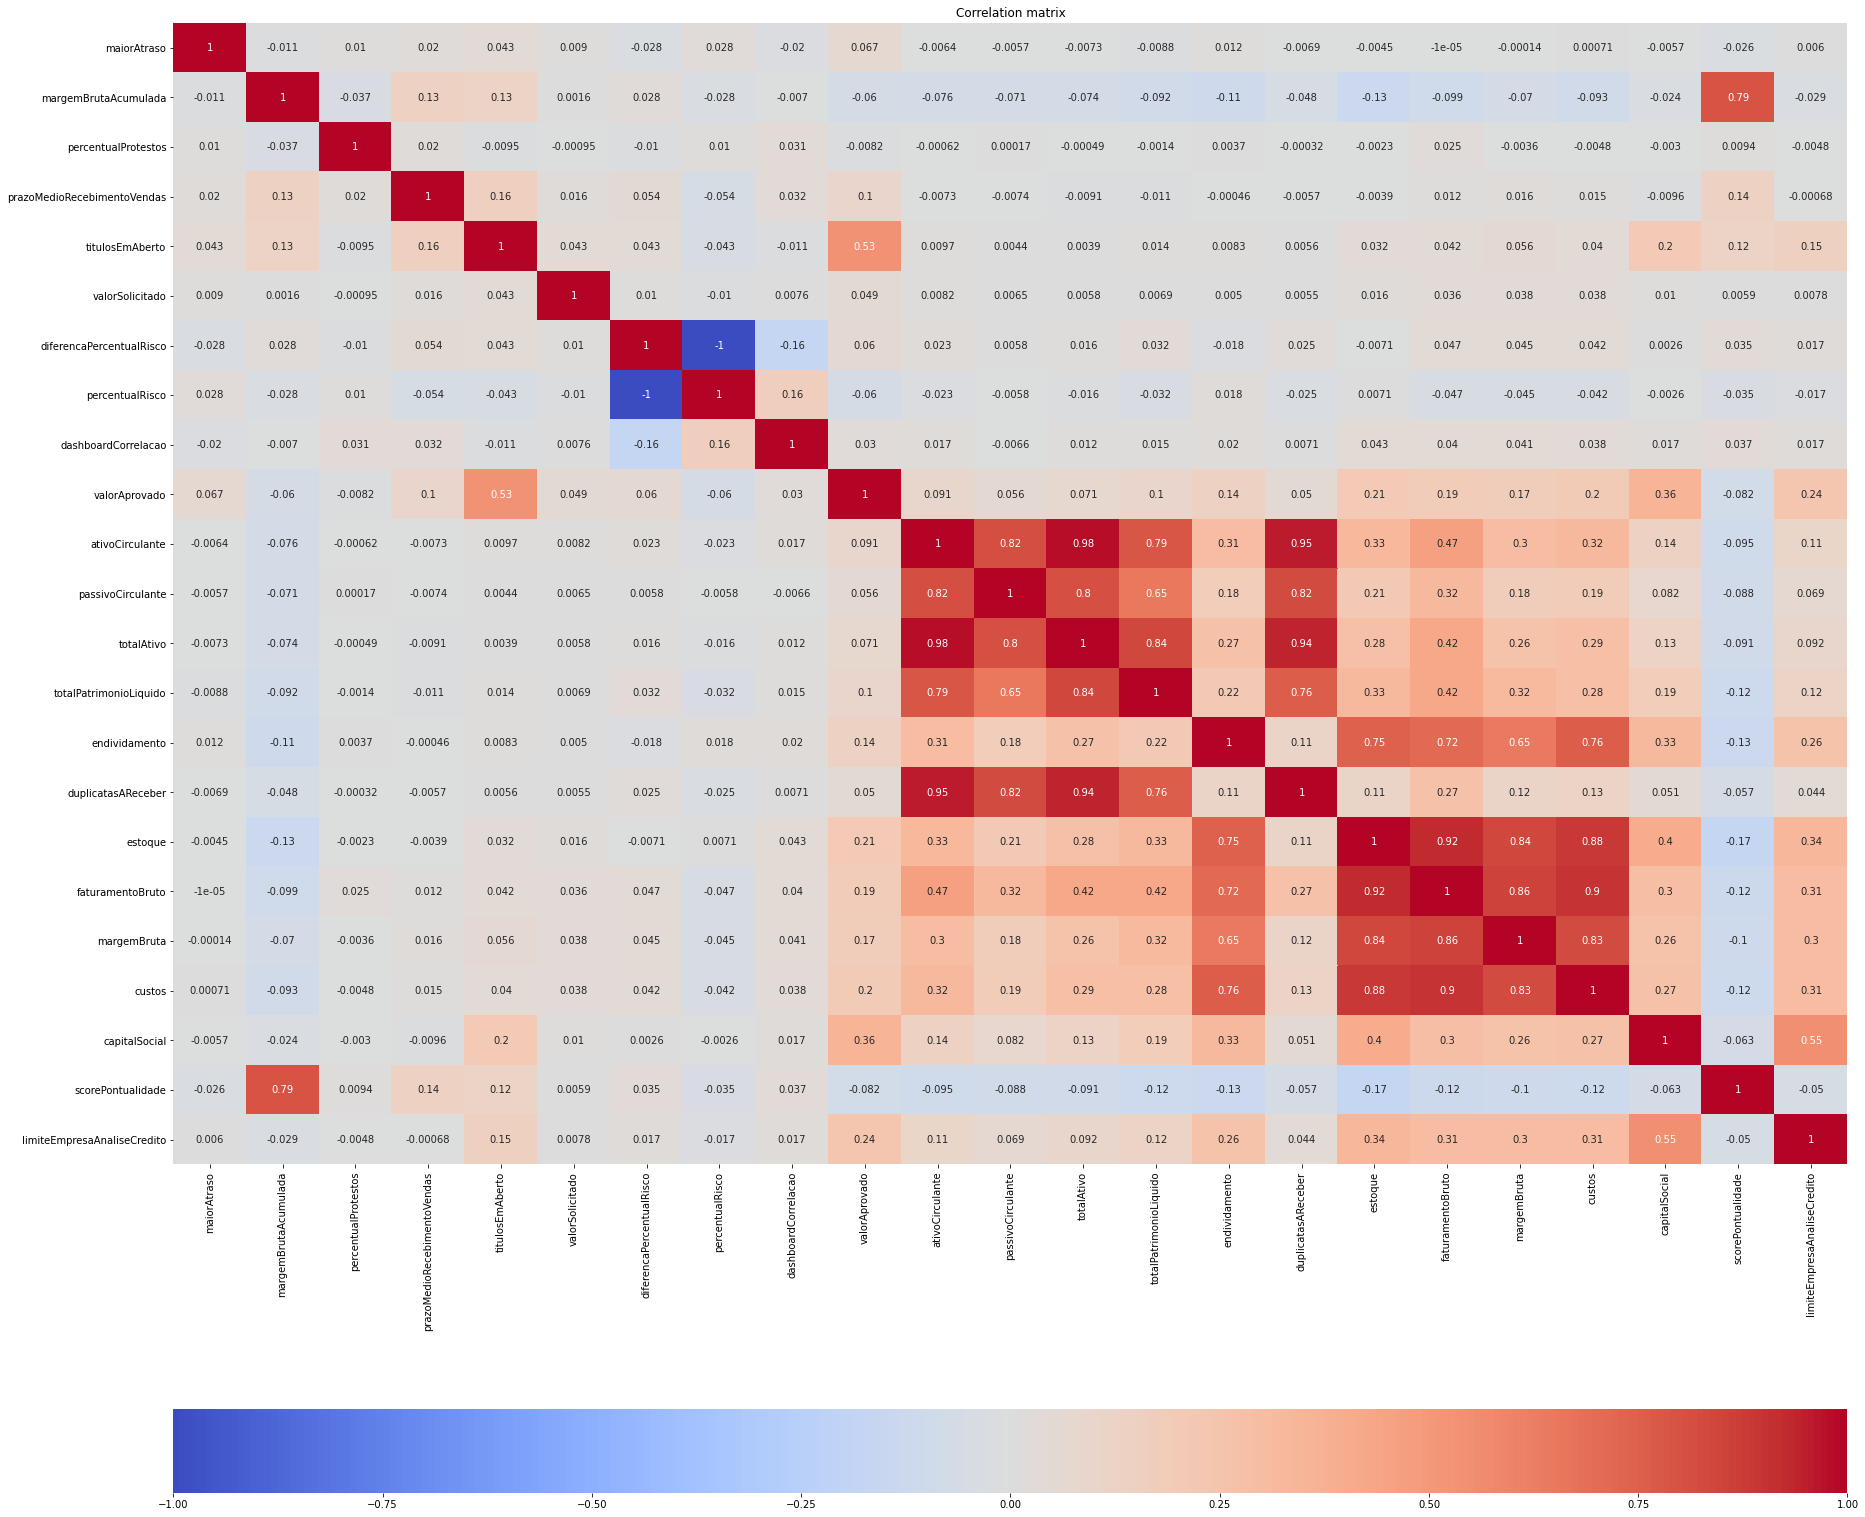

In [279]:
plt.figure(figsize=(30,30)) 
print(sbs.heatmap(df.corr(), annot=True, cmap="coolwarm",cbar_kws= {'orientation': 'horizontal'}),"\n")
plt.title('Correlation matrix')

In [280]:
df.shape

(8683, 26)

In [281]:
correlated_features = set()
correlation_matrix = df.corr()
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

df.drop(labels=correlated_features, axis=1, inplace=True)

In [282]:
df.shape

(8683, 22)

AxesSubplot(0.125,0.3515;0.775x0.5285) 



Text(0.5, 1.0, 'Correlation matrix')

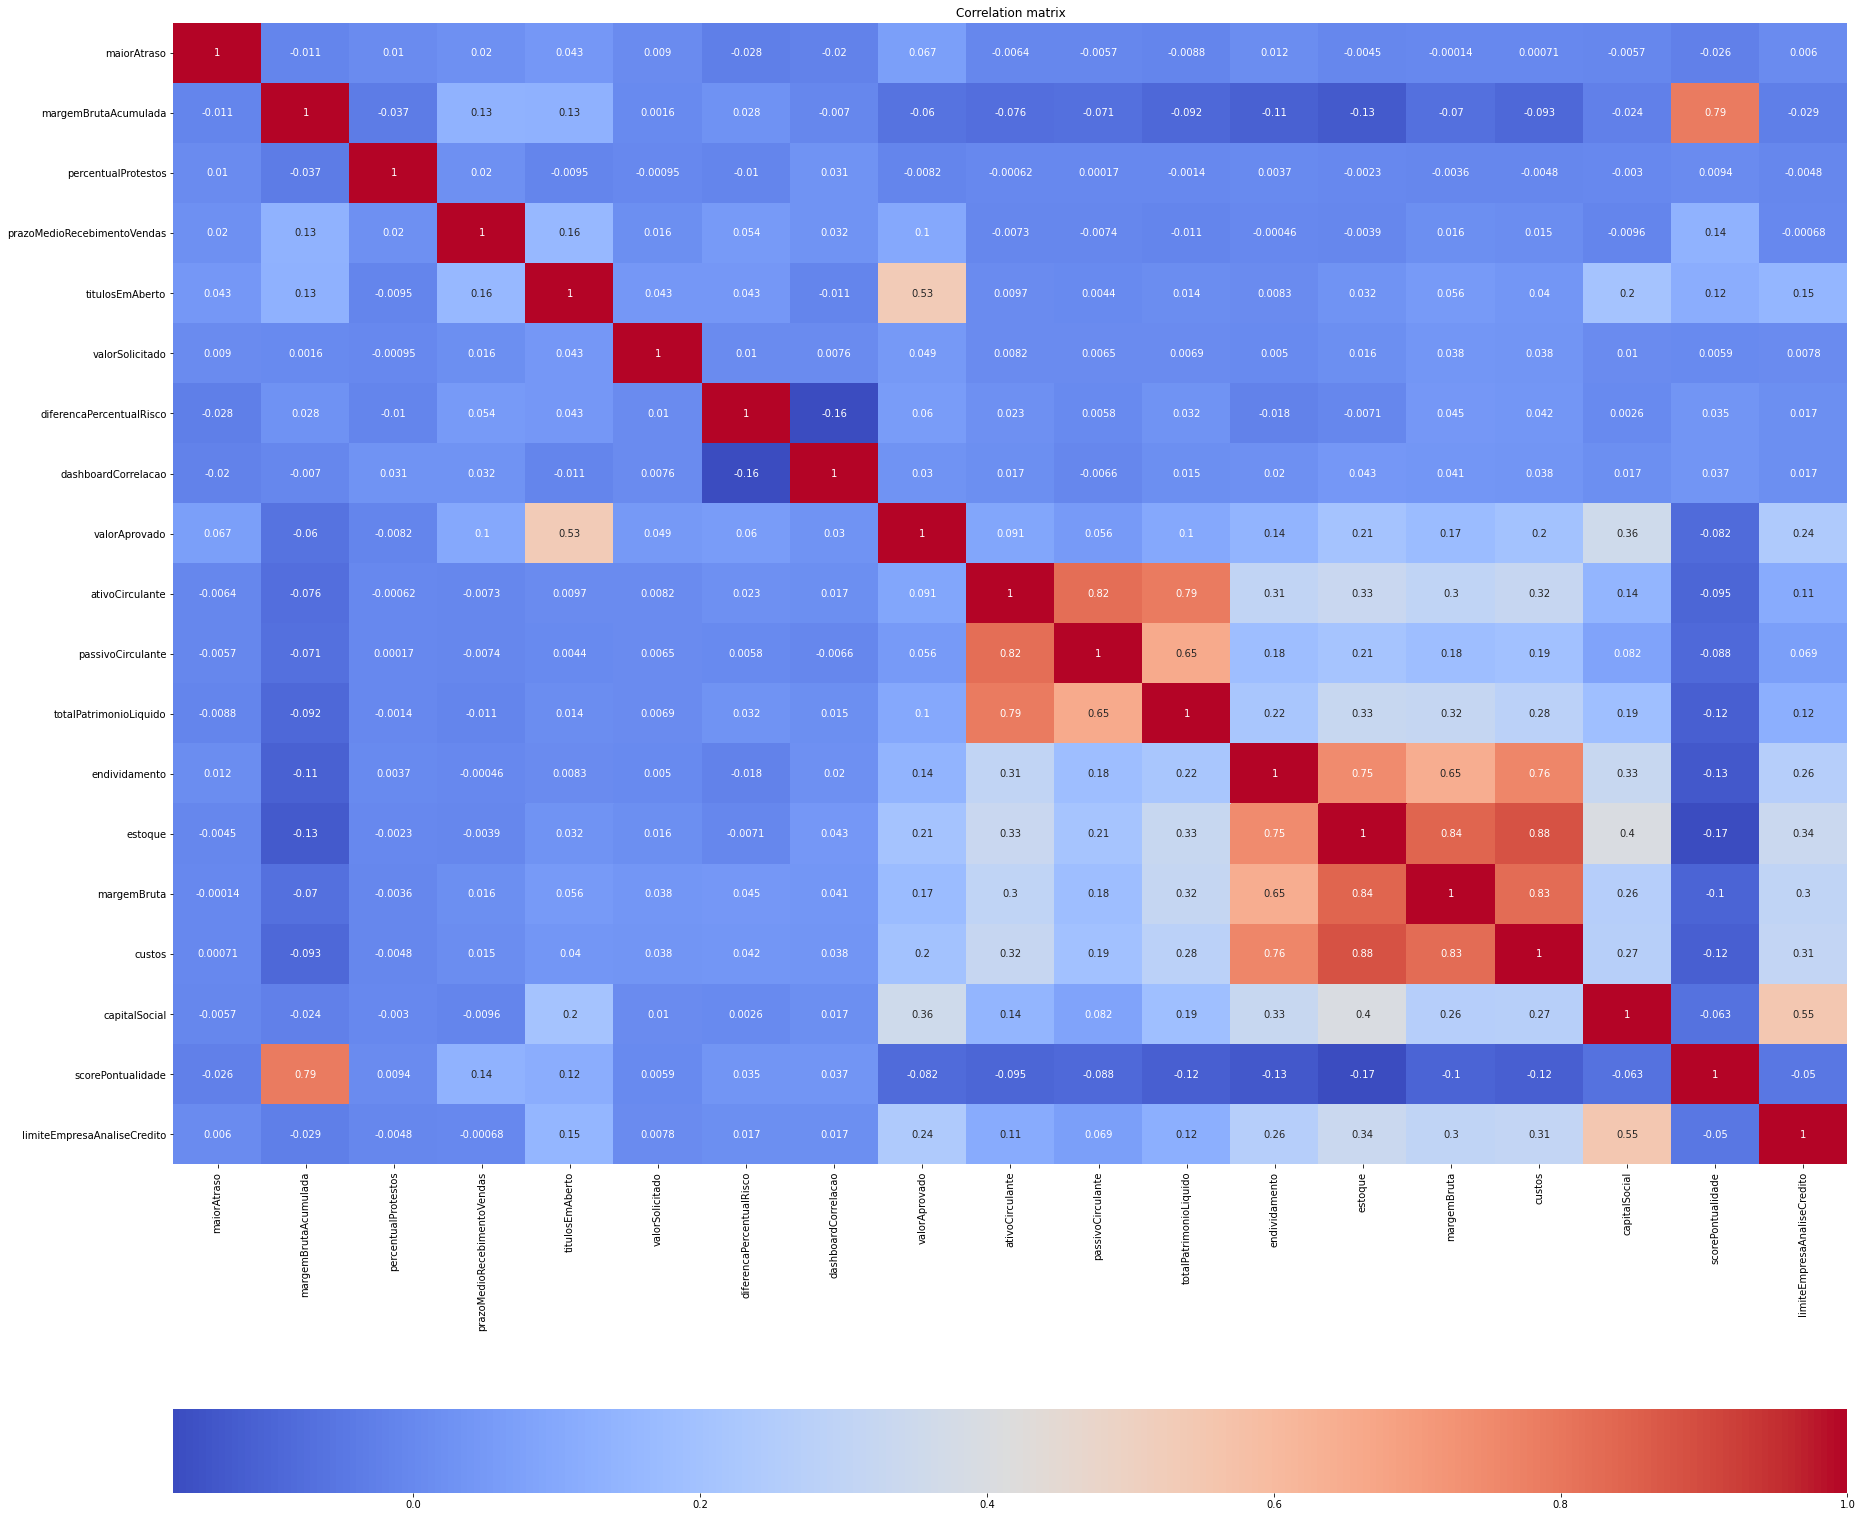

In [283]:
plt.figure(figsize=(30,30)) 
print(sbs.heatmap(df.corr(), annot=True, cmap="coolwarm",cbar_kws= {'orientation': 'horizontal'}),"\n")
plt.title('Correlation matrix')

In [284]:
dft = df.copy()

* *Retirando os campos que não temos interesse*

In [285]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8683 entries, 0 to 8961
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   maiorAtraso                  8683 non-null   int64  
 1   margemBrutaAcumulada         8683 non-null   float64
 2   percentualProtestos          7251 non-null   float64
 3   prazoMedioRecebimentoVendas  8683 non-null   int64  
 4   titulosEmAberto              8683 non-null   float64
 5   valorSolicitado              8683 non-null   float64
 6   definicaoRisco               8683 non-null   object 
 7   diferencaPercentualRisco     8683 non-null   float64
 8   dashboardCorrelacao          8683 non-null   float64
 9   valorAprovado                7569 non-null   float64
 10  ativoCirculante              4708 non-null   float64
 11  passivoCirculante            4708 non-null   float64
 12  totalPatrimonioLiquido       4708 non-null   float64
 13  endividamento     

* *Completamos os campos e geramos dummy para as colunas categoricas

In [286]:
pd.get_dummies(dft)
dft.fillna(method ='ffill', inplace = True) 
#dft.fillna(dft.mean(), inplace=True)
dfx=dft.dropna()
dfx=dfx.drop_duplicates()

In [256]:
dfx.head()

,maiorAtraso,margemBrutaAcumulada,percentualProtestos,prazoMedioRecebimentoVendas,titulosEmAberto,valorSolicitado,definicaoRisco,dashboardCorrelacao,valorAprovado,ativoCirculante,passivoCirculante,totalPatrimonioLiquido,endividamento,estoque,margemBruta,custos,capitalSocial,restricoes,empresa_MeEppMei,scorePontualidade,limiteEmpresaAnaliseCredito
4,20,0.454,0.000,20,1486.950,50000.000,2,0.000,50000.000,14758917.000,12149031.000,14544378.000,3039112.000,3047791.000,81459809.000,40680051.000,75000.000,False,0,1.000,89000.000
5,0,0.000,0.000,0,0.000,25000.000,3,0.000,20000.000,14758917.000,12149031.000,14544378.000,3039112.000,3047791.000,0.000,0.000,15000.000,False,1,0.000,38400.000
6,16,0.000,0.000,0,0.000,100000.000,3,-0.998,80000.000,14758917.000,12149031.000,14544378.000,3039112.000,3047791.000,-7540544.000,156394112.000,30515674.000,True,0,0.000,18132588.000
7,4,0.350,0.000,102,208980.000,300000.000,1,0.000,300000.000,17801610.000,2538069.000,7519758.000,0.000,11902384.000,9357949.000,0.000,120000.000,False,0,1.000,768233.000
8,43,0.246,0.000,27,6432.000,400000.000,2,0.000,400000.000,36827690.000,13843198.000,25612746.000,0.000,11420388.000,6233236.000,-49267738.000,1000000.000,False,0,1.000,6910219.000


## **3.Criando um novo DF**

* criando o novo DF com as colunas que vamos trabalhar na clusterização

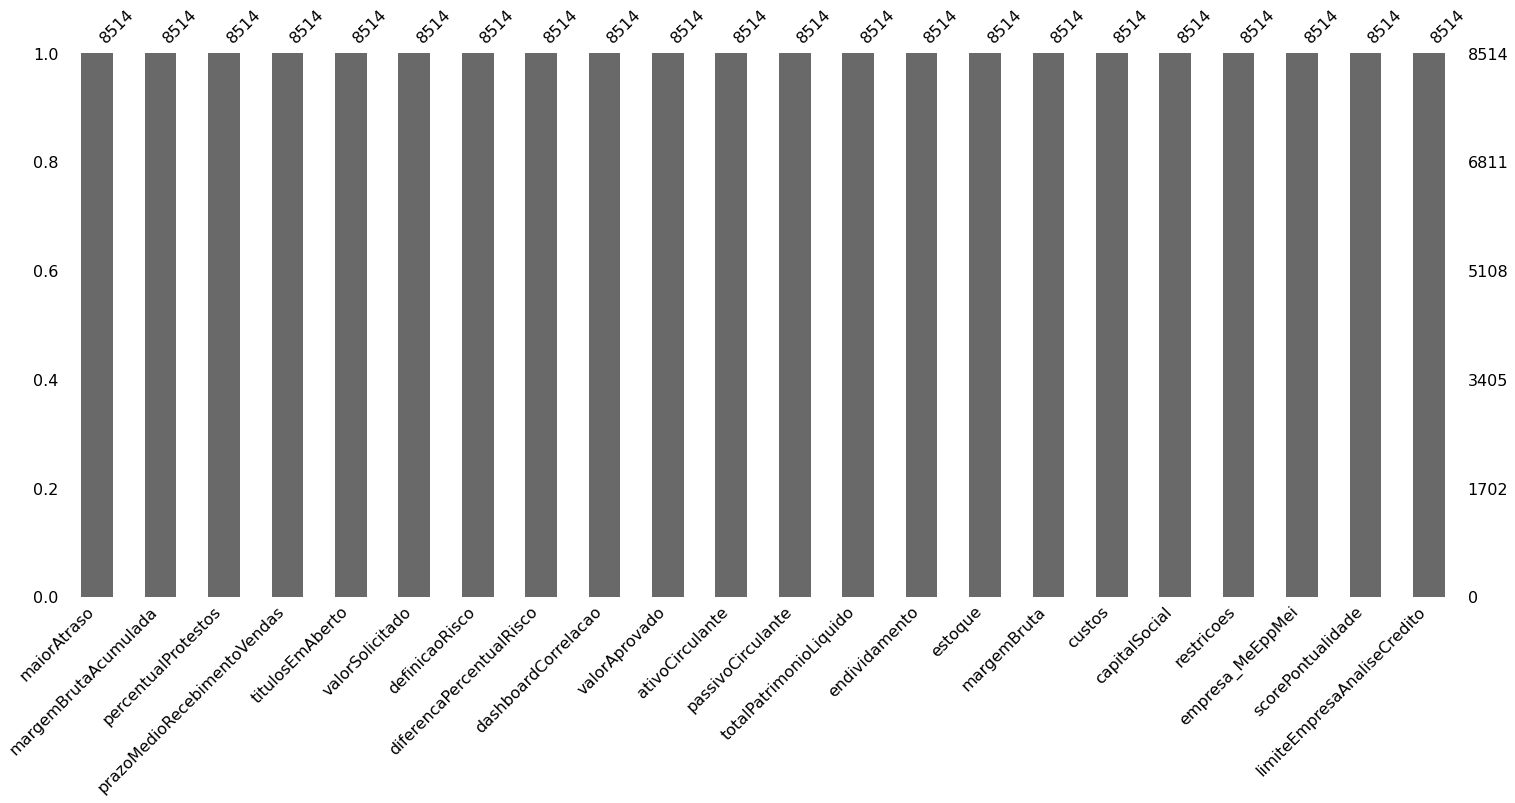

In [287]:
%matplotlib inline
msno.bar(dfx)

AxesSubplot(0.125,0.3515;0.775x0.5285) 



Text(0.5, 1.0, 'Correlation matrix')

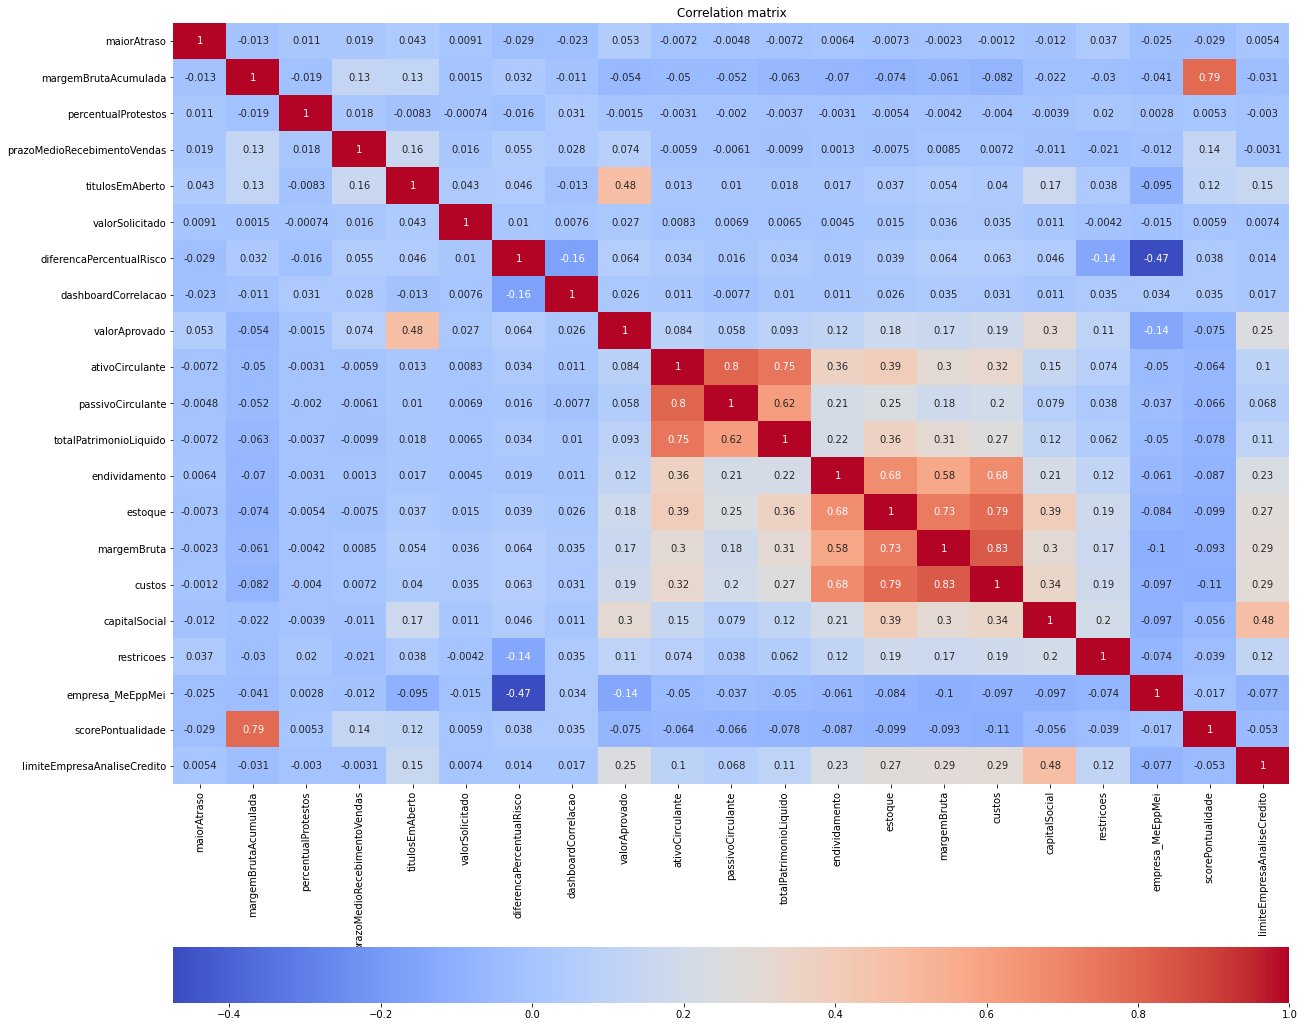

In [288]:
plt.figure(figsize=(20,20)) 
print(sbs.heatmap(dfx.corr(), annot=True, cmap="coolwarm",cbar_kws= {'orientation': 'horizontal'}),"\n")
plt.title('Correlation matrix')

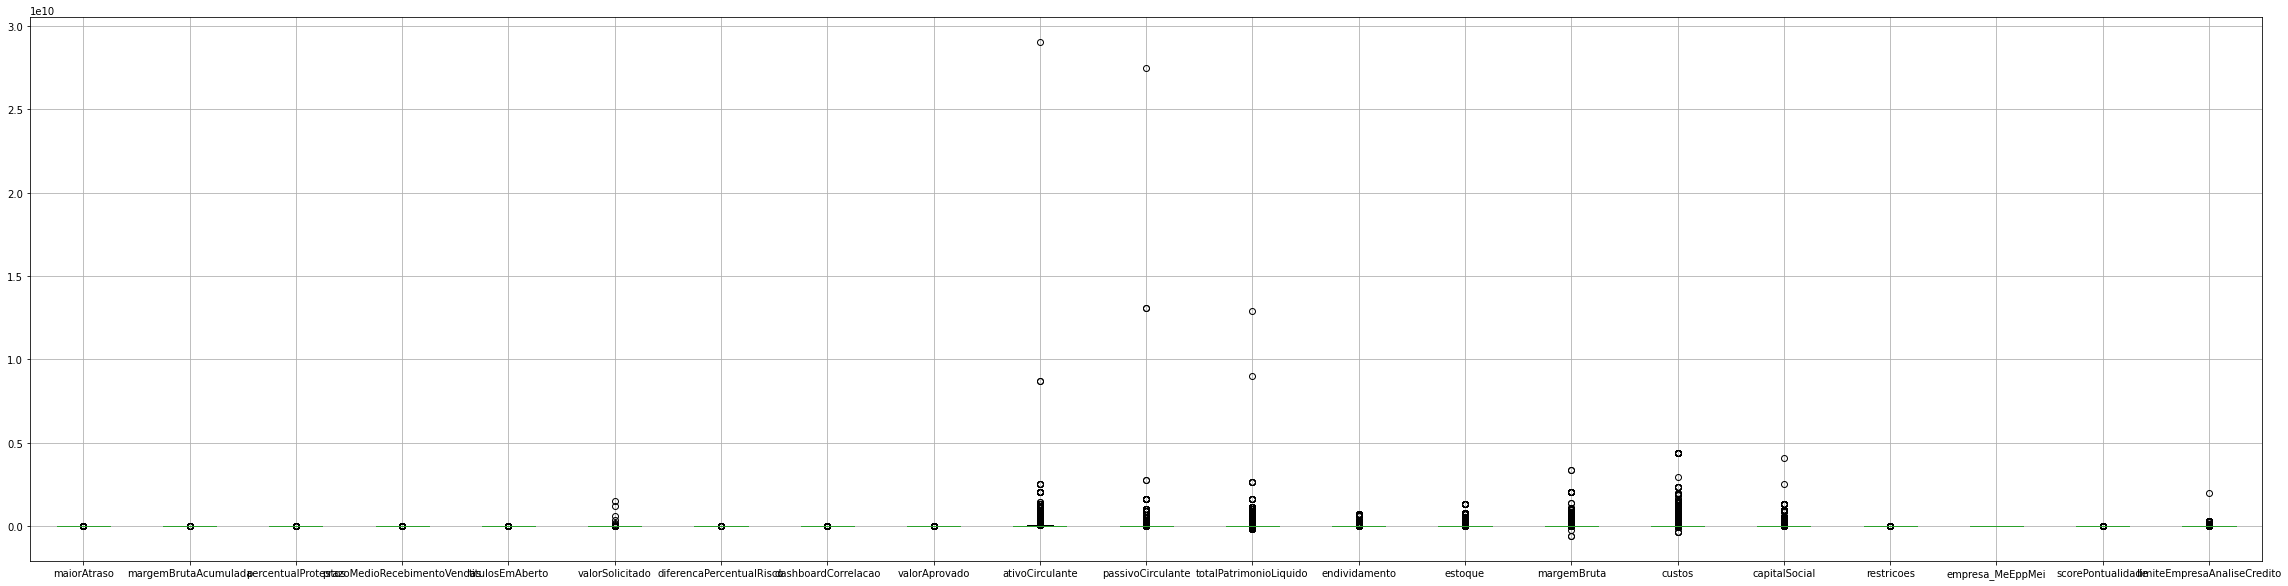

In [289]:
plt.figure(figsize=(40,10))
dfx.boxplot()

* * vamos remover outliers mais gritantes

In [290]:
#dfx[dfx["totalAtivo"]>2000000000].count()

In [291]:
dfx = dfx[dfx["ativoCirculante"]<3000000000]
dfx = dfx[dfx["totalPatrimonioLiquido"]<2000000000]
dfx = dfx[dfx["capitalSocial"]<2100000000.000]
#dfx = dfx[dfx["totalAtivo"]<2500000000.000]
dfx = dfx[dfx["passivoCirculante"]<3600000000.000]
#dfx = dfx[dfx["faturamentoBruto"]<2000000000.000]

In [292]:
pd.options.display.float_format = "{:.3f}".format

dfx.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
maiorAtraso,8501.000,24.559,66.428,0.000,3.000,6.000,22.000,1265.000
margemBrutaAcumulada,8501.000,0.364,0.201,0.000,0.286,0.404,0.508,1.000
percentualProtestos,8501.000,0.018,0.540,0.000,0.000,0.000,0.000,36.984
prazoMedioRecebimentoVendas,8501.000,22.559,67.534,0.000,0.000,0.000,29.000,1605.000
titulosEmAberto,8501.000,61311.922,236417.675,0.000,0.000,0.000,15672.080,3938589.700
valorSolicitado,8501.000,678702.280,22264639.825,100.000,20000.000,50000.000,110000.000,1500000000.000
diferencaPercentualRisco,8501.000,0.742,0.142,0.208,0.643,0.750,0.857,1.000
dashboardCorrelacao,8501.000,0.051,0.478,-1.000,0.000,0.000,0.000,1.000
valorAprovado,8501.000,188471.443,547054.057,0.000,15200.000,35000.000,100000.000,10700000.000
ativoCirculante,8501.000,33750580.880,140012918.616,-17.000,859048.000,3642393.000,14553288.000,2061794000.000


## **4.Fazendo a segmentação dos clientes**

In [293]:
# separando os conjuntos
X=dfx.copy()
#X=X.drop("definicaoRisco",1)
#Y=dfx[["definicaoRisco"]]

In [294]:
#normaliza o dado pois o k-means eh sensivel a outlier
X_norm = MinMaxScaler().fit_transform(X)

ValueError: ignored

In [265]:
#Transforma o dado normalizando em dataframe

dtaux = pd.DataFrame(X_norm)
#dtaux

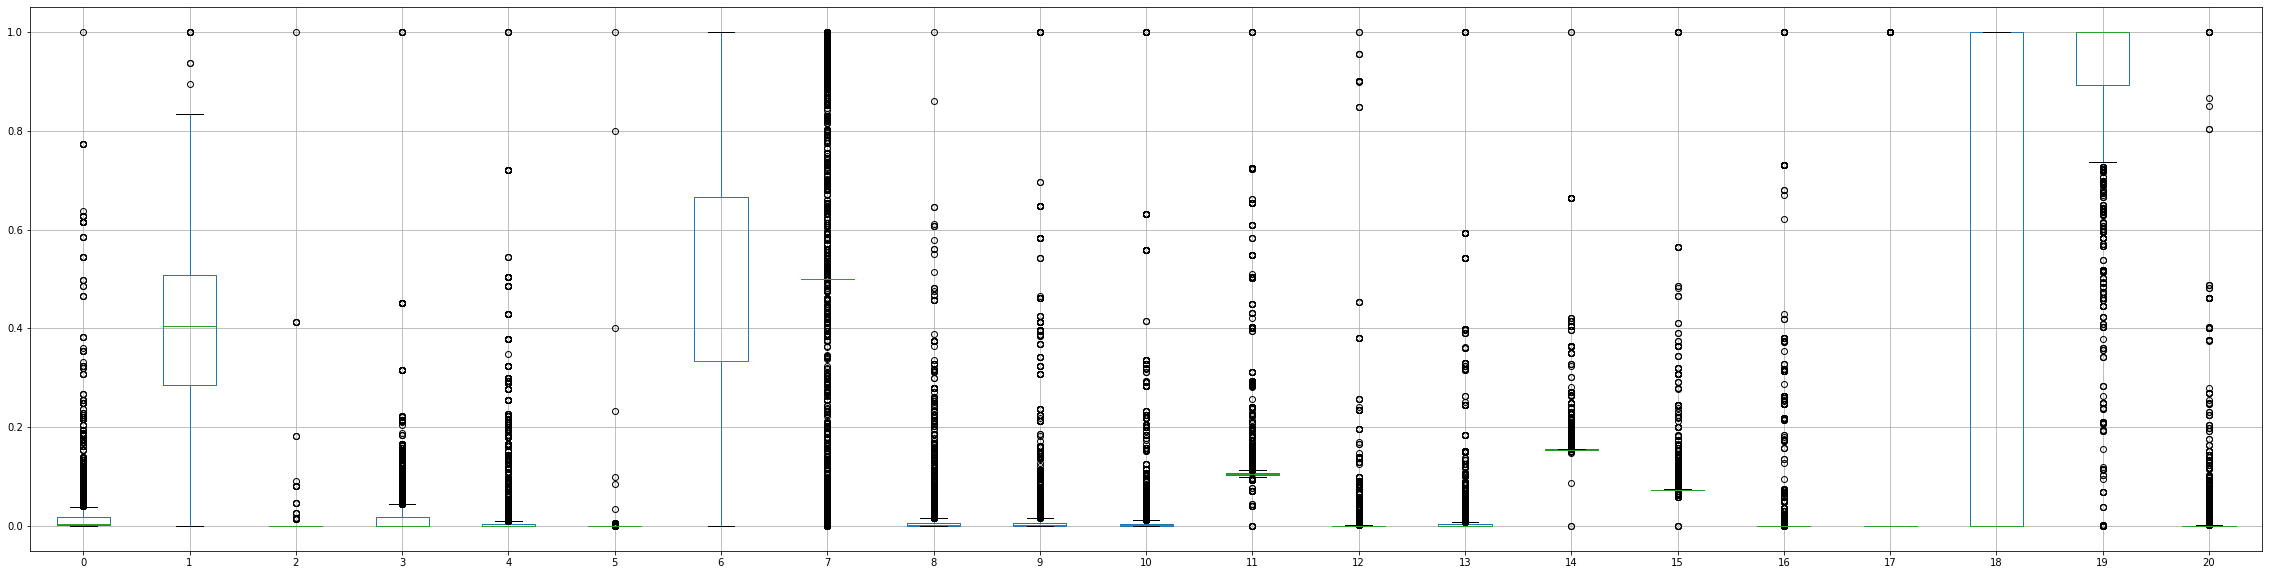

In [266]:
plt.figure(figsize=(40,10))
dtaux.boxplot()

In [267]:
#Método Elbow e silhouete para encontrar o melhor valor de k
scores = []
inertias =[]
for i in range(2, 20):
    kmeans = KMeans(n_clusters = i,max_iter=100).fit(dtaux)    
    #somatório dos erros quadráticos das instâncias de cada cluster
    inertias.append(kmeans.inertia_)
    scores.append( silhouette_score(dtaux.values, kmeans.labels_))


* *Aplicando a curva de elbow para identificar o numero de cluster

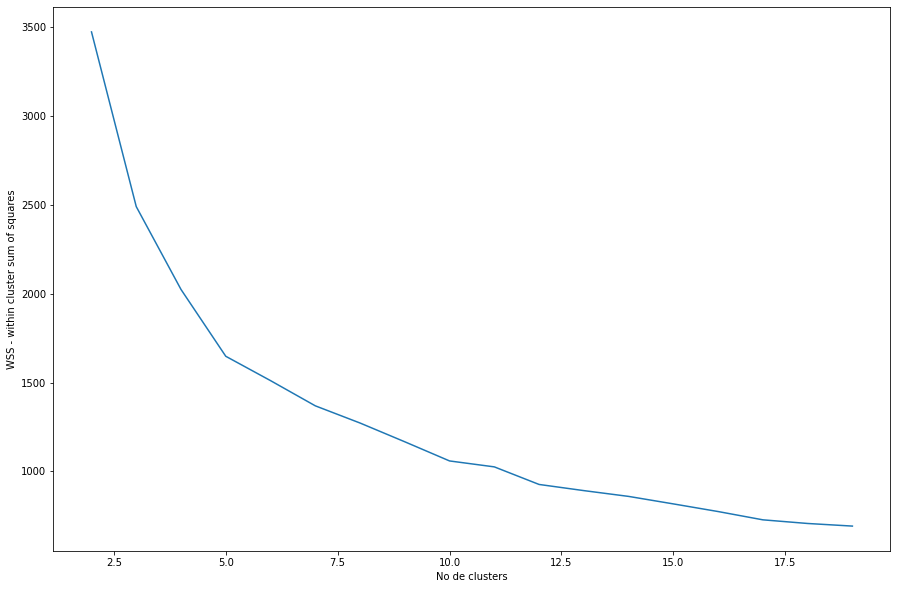

In [268]:
plt.figure(1,figsize=(15,10))
plt.plot(range(2, 20), inertias)
plt.xlabel('No de clusters')
plt.ylabel('WSS - within cluster sum of squares')
plt.show()

* *Aplicado o metodo de silhouete para identificar o numero de cluster

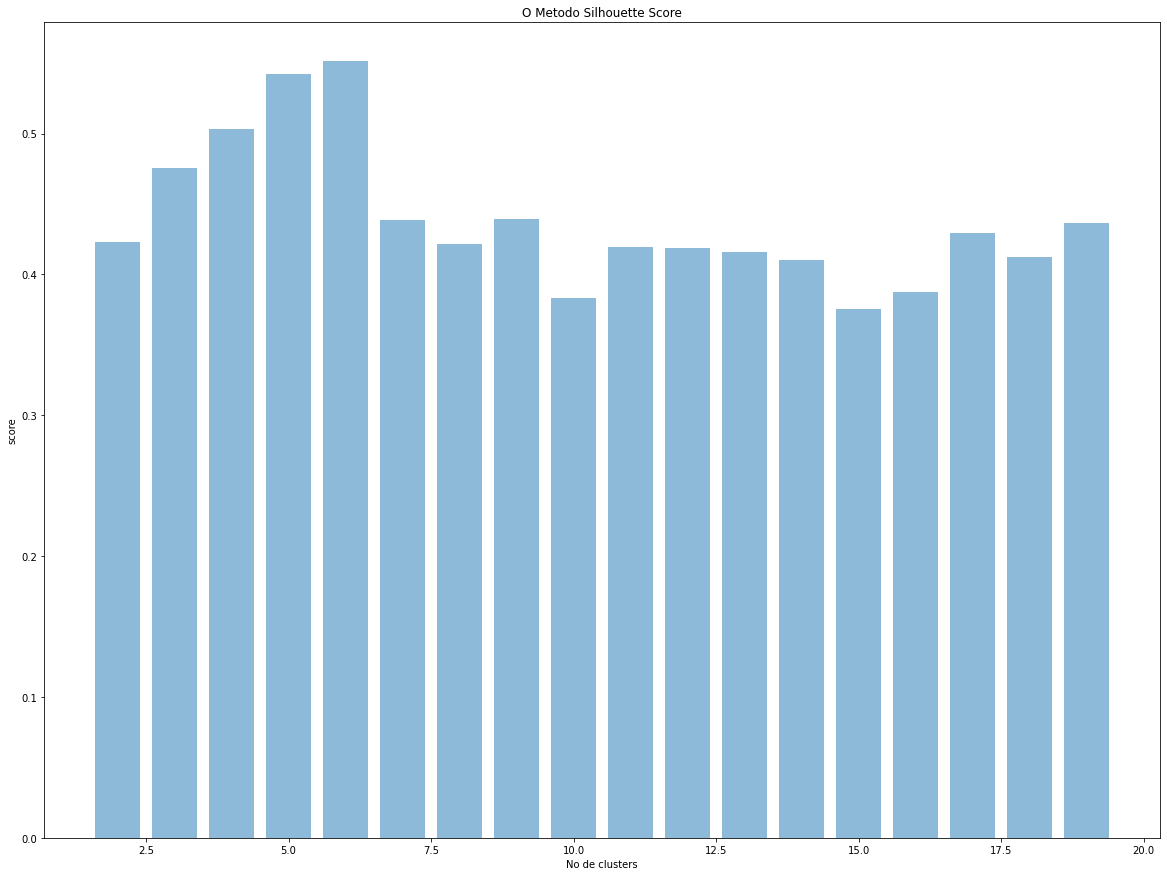

In [269]:
plt.figure(2, figsize=(20,15))
plt.bar(range(2, 20), scores,  align='center', alpha=0.5)
plt.title('O Metodo Silhouette Score')
plt.xlabel('No de clusters')
plt.ylabel('score')
plt.show()

* Com o silhouette conseguimos confirmar 4 cluster é o melhor

In [270]:
#O melhor k é igual a 4 
clt =KMeans(n_clusters = 6, max_iter=100)
model= clt.fit(X_norm)

In [271]:
X["cluster"]=model.labels_
X.head()

,maiorAtraso,margemBrutaAcumulada,percentualProtestos,prazoMedioRecebimentoVendas,titulosEmAberto,valorSolicitado,definicaoRisco,dashboardCorrelacao,valorAprovado,ativoCirculante,passivoCirculante,totalPatrimonioLiquido,endividamento,estoque,margemBruta,custos,capitalSocial,restricoes,empresa_MeEppMei,scorePontualidade,limiteEmpresaAnaliseCredito,cluster
4,20,0.454,0.000,20,1486.950,50000.000,2,0.000,50000.000,14758917.000,12149031.000,14544378.000,3039112.000,3047791.000,81459809.000,40680051.000,75000.000,False,0,1.000,89000.000,3
5,0,0.000,0.000,0,0.000,25000.000,3,0.000,20000.000,14758917.000,12149031.000,14544378.000,3039112.000,3047791.000,0.000,0.000,15000.000,False,1,0.000,38400.000,4
6,16,0.000,0.000,0,0.000,100000.000,3,-0.998,80000.000,14758917.000,12149031.000,14544378.000,3039112.000,3047791.000,-7540544.000,156394112.000,30515674.000,True,0,0.000,18132588.000,1
7,4,0.350,0.000,102,208980.000,300000.000,1,0.000,300000.000,17801610.000,2538069.000,7519758.000,0.000,11902384.000,9357949.000,0.000,120000.000,False,0,1.000,768233.000,3
8,43,0.246,0.000,27,6432.000,400000.000,2,0.000,400000.000,36827690.000,13843198.000,25612746.000,0.000,11420388.000,6233236.000,-49267738.000,1000000.000,False,0,1.000,6910219.000,3


In [94]:
#clusters=pd.concat([X, pd.DataFrame({'cluster':model.labels_})], axis=1)
#clusters.head()

## **5.Fazendo visualizações**

In [272]:
lstclusters = X['cluster'].unique()
lstclusters

array([3, 4, 1, 5, 0, 2], dtype=int32)

* *Visualizando os clusters em formato de barra

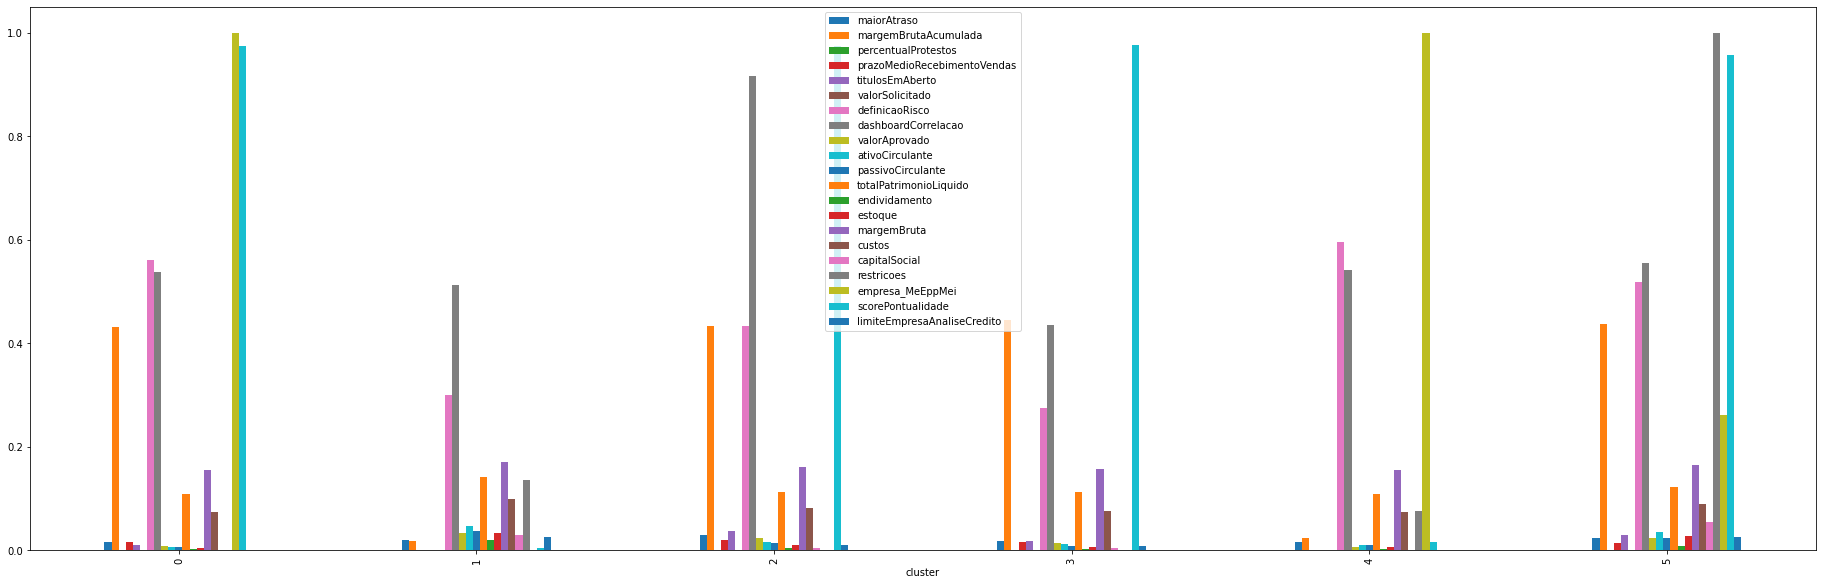

In [273]:

X_minmax = MinMaxScaler().fit_transform(X.values)

df_norm = pd.DataFrame(X_minmax)
df_norm.columns = X.columns

df_norm['cluster'] = model.labels_ #bestKmeans.labels_
df_norm.head() 

df_res = df_norm.groupby('cluster').mean()

df_res.plot(kind='bar', figsize=(32,10))

* *Visualizando cada cluster individualmente

<Figure size 720x720 with 0 Axes>

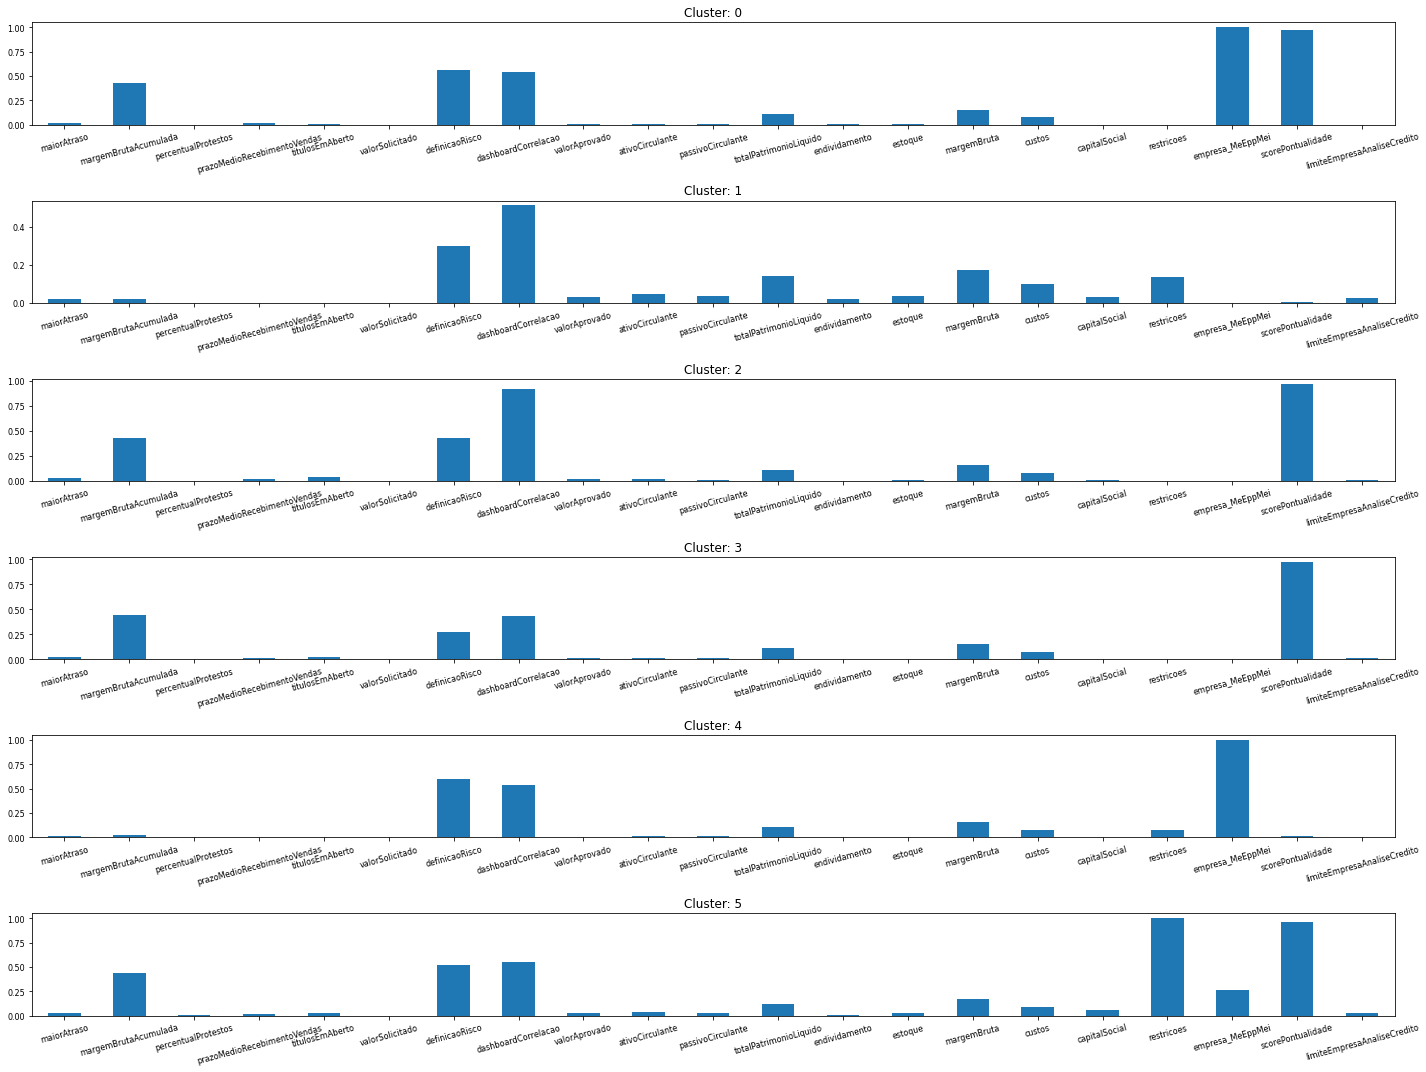

In [274]:
labels = model.labels_
qtdClusters = len(set(labels))

plt.figure(figsize=(10,10))
fig, axes = plt.subplots(nrows=qtdClusters, ncols=1, figsize=(20,15))

for c in set(labels):        
    medias =  df_norm[ df_norm.cluster== c].mean()
    medias.drop(['cluster'], inplace = True)
    medias.plot(ax = axes[c], kind='bar', fontsize=8, title = 'Cluster: ' + str(c), rot=15 )
  
fig.tight_layout()

In [56]:
import plotly.express as px



colnames = df_norm.drop(['cluster'], axis = 1).columns
for c in set(labels):        
    medias =  df_norm[ df_norm.cluster== c].mean()
    medias.drop(['cluster'], inplace = True)
    
    fig = px.line_polar(medias,r=medias.values , theta= colnames, line_close=True)
    fig.update_traces(fill='toself')
    fig.show()

* * Visualizando em formato de radar

In [57]:
import plotly.graph_objects as go

labels=model.labels_
colnames = df_norm.drop(['cluster'], axis = 1).columns
fig = go.Figure()

for c in set(labels):        
    medias =  df_norm[ df_norm.cluster== c].mean()
    medias.drop(['cluster'], inplace = True)
    
    fig.add_trace(go.Scatterpolar(
          r=medias.values,
          theta=colnames,
          fill='toself',
          name='Cluster ' + str(c)
    ))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=True
)


fig.update_layout(
    autosize=False,
    width=800,
    height=800,)

fig.show()

* **Fazendo redução da dimensionalidade** <br>
 *Agora vamos fazer uma analise de compoentes nesses dados para entender melhor. Faremos a transformação ortogonal para plotar em 3D*

In [58]:
#Faremos 2D
pca = PCA(n_components=2).fit_transform(X_norm)
pca

array([[-0.36507073, -0.22425402],
       [ 0.72486835,  0.83754303],
       [-0.23536476,  0.87155361],
       ...,
       [-0.47598895,  0.09697858],
       [ 0.57699136, -0.24976872],
       [-0.37186827, -0.21601955]])

<Figure size 432x288 with 0 Axes>

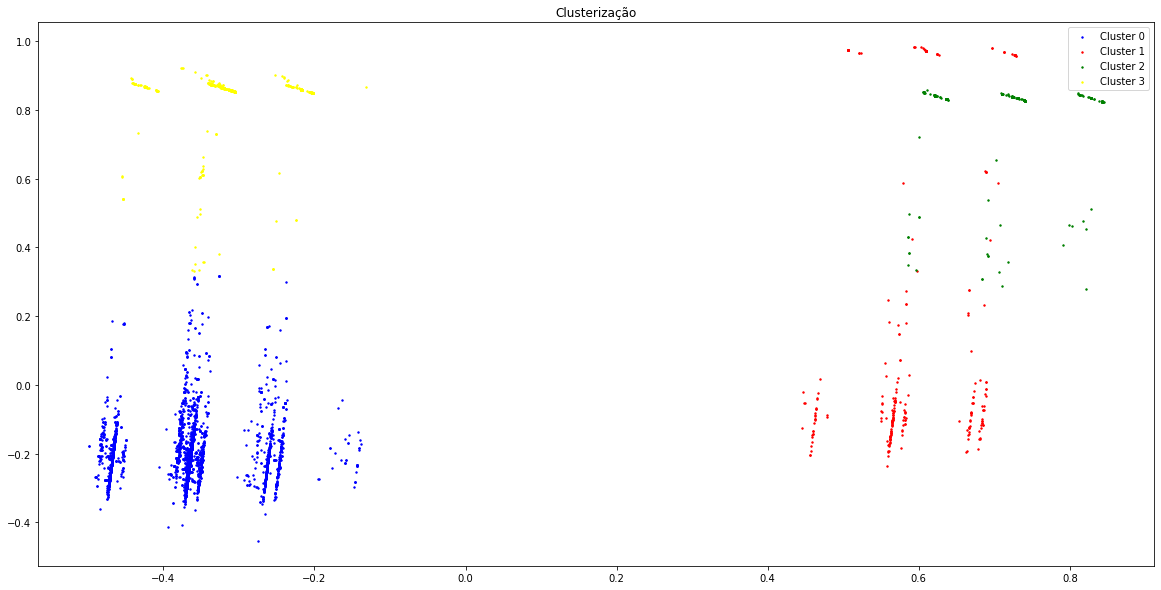

In [63]:
plt.figure(3)
plt.figure(figsize=(20,10))
#Faz a plotagem dos registros do primeiro cluster 0 (y_kmeans == 0) e utiliza as colunas de indice 0 e 1 (sepal_Length e sepal_width) para a plotagem dos pontos nas intruções x[y_kmeans == 0, 0] e x[y_kmeans == 0, 1]
plt.scatter(pca[labels == 0, 0], pca[labels == 0, 1], s = 2, c = 'blue', label = 'Cluster 0')
plt.scatter(pca[labels == 1, 0], pca[labels == 1, 1], s = 2, c = 'red', label = 'Cluster 1')
plt.scatter(pca[labels == 2, 0], pca[labels == 2, 1], s = 2, c = 'green', label = 'Cluster 2')
plt.scatter(pca[labels == 3, 0], pca[labels == 3, 1], s = 2, c = 'yellow', label = 'Cluster 3')


plt.legend()
plt.title('Clusterização')
plt.show()

In [61]:
#Faremos agora 3D
pca3 = PCA(n_components=3).fit_transform(X_norm)

df_pca = pd.DataFrame(data=pca3, columns=['PC1','PC2','PC3'])
df_pca['Cluster'] = labels
df_pca.head()

,PC1,PC2,PC3,Cluster
0,-0.365,-0.224,-0.147,0
1,0.725,0.838,-0.166,2
2,-0.235,0.872,-0.327,3
3,-0.466,-0.179,-0.139,0
4,-0.361,-0.137,-0.158,0


In [62]:
fig = px.scatter_3d(df_pca, x='PC1', y='PC2', z='PC3',
              color='Cluster' )
#fig.show()
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),autosize=False,width=1200,height=900,)